Section 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('clusterData.csv')
df

,x,y
0,0.539747,-0.074340
1,-0.748366,0.499009
2,2.602590,0.726548
3,2.156531,1.427136
4,1.402052,-1.964871
...,...,...
1135,-6.164682,-5.015899
1136,0.599753,-2.005821
1137,8.497472,5.390017
1138,-3.044420,-4.584089


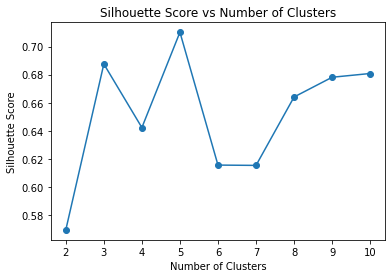

In [3]:
'''1. Plot silhouette score vs number of clusters (try 2-10)'''
silhouette_scores = []
k_values = list(range(2, 11))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette score vs number of clusters
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [4]:
optimal_clusters = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 5


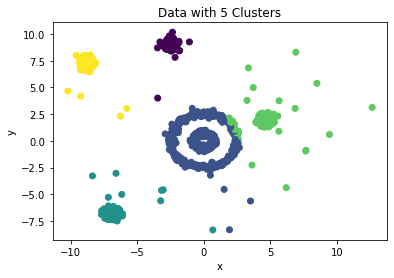

In [5]:
'''3. Plot the data with the optimal number of clusters, using the cluster label as the color code. 
Describe what you see.'''
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
df['cluster_label'] = kmeans_optimal.fit_predict(df)

# Plotting the data with optimal clusters
plt.scatter(df['x'], df['y'], c=df['cluster_label'], cmap='viridis')
plt.title(f'Data with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Section 2

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
'''Fit the data with DBScan. Choose an appropriate value of eps and min_samples to fit the data, 
you can use your knowledge of the distributions and standard deviations to make an informed 
decision. Dont make epsilon too large, the score will increase but you won’t get the concentric 
circles which we know to be separate.
'''
df = pd.read_csv('clusterData.csv')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [8]:
eps = 0.2  # Adjust epsilon based on your understanding of the data distribution
min_samples = 5  # Adjust min_samples based on your understanding of the data density

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster_label'] = dbscan.fit_predict(X_scaled)

In [9]:
'''5. How many clusters did you create?'''
unique_label = np.unique(df['cluster_label'])
num_clusters = len(unique_label[unique_label != -1])
print(f'Number of clusters: {num_clusters}')

Number of clusters: 6


In [10]:
'''6. What is the silhouette score?'''
silhouette_avg = silhouette_score(df, df['cluster_label'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5882658578178795


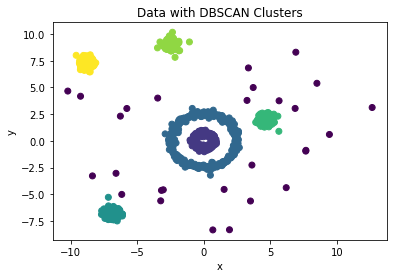

In [11]:
'''7. Plot the data with using the cluster label as the color code. Describe what you see'''

plt.scatter(df['x'], df['y'], c=df['cluster_label'], cmap='viridis')
plt.title(f'Data with DBSCAN Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()